In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request
from scipy.stats import mode

from multiprocessing import Pool

Get and format data

In [2]:
rules_file = open("dane/ClassificationRules.txt","r")
rules_data = rules_file.readlines()
rules = np.empty((266,9350))
for i in range(266):
     rules[i, :] = list(map(float, rules_data[i].split()))
        

expert_file = open("dane/ImageExpertReduced.txt","r")
expert = expert_file.readlines()
expert = np.array([list(map(float, expert[0].split()))])

print(expert.shape)
print(rules.shape)

(1, 9350)
(266, 9350)


Implementacja PBIL z zad. 2

In [3]:
def random_individual(p,d):
    random_vec = np.random.rand(d)
    return (random_vec < p).astype(int)

def random_population(p,d,N):
    return np.array([random_individual(p,d) for i in range(N)])

In [4]:
most_voted = lambda v: mode(v)[0]

def opt_f(x):
    x = x[np.newaxis,:]
    rules_in_use = rules[np.nonzero(x)[1]]
    votes = np.array([most_voted(v) for v in rules_in_use.T])
    votes = votes.T
    return ((votes == expert).sum() / expert.shape[1])

In [21]:
def PBIL(d,N,t1,t2,t3,T,threads):

    costs = np.zeros((3,T))
    bests = np.zeros((T,d))
    p_arr = np.zeros((T,d))
    
    p = np.ones(d)
    p = p/2
    P = random_population(p,d,N)
    last = time.time()
    for t in range(T):
        
        val = np.empty(1)
        with Pool(threads) as pool:
            val = np.array(pool.map(opt_f, P))
            pool.close()
            pool.join()
        x_best = P[val.argmax()]

        costs[0][t] = val.max()
        costs[1][t] = val.mean()
        costs[2][t] = val.min()

        bests[t] = x_best
        p_arr[t] = p
        
        for i in range(N):
            p = p * (1 - t1) + x_best * t1

        for j in range(N):
            if np.random.rand() < t2:
                p = p * (1 - t3) + random_individual((np.ones(d)/2),d) * t3

        P = random_population(p,d,N)
        
        print(t, time.time() - last)
        last = time.time()
    return (costs,bests,p_arr)

In [6]:
data = PBIL(266,50,0.045,0.015,0.02,900,10)

0 7.264217853546143
1 7.314855098724365
2 7.1123433113098145
3 7.196235656738281
4 7.241863965988159
5 7.510961532592773
6 7.586102485656738
7 7.716515064239502
8 7.878429651260376
9 7.815775394439697
10 7.812750339508057
11 7.791622638702393
12 8.027544498443604
13 7.87273383140564
14 7.945720911026001
15 7.836664199829102
16 7.9898669719696045
17 7.76361608505249
18 7.98345685005188
19 8.013096332550049
20 7.863837480545044
21 7.825477123260498
22 7.894007444381714
23 8.004275560379028
24 7.983837127685547
25 7.991621017456055
26 7.9778032302856445
27 7.986769199371338
28 8.091644287109375
29 8.044635534286499
30 8.018518686294556
31 8.005831480026245
32 7.9567742347717285
33 7.837645530700684
34 8.184730768203735
35 7.9792866706848145
36 8.017712116241455
37 7.994802713394165
38 7.984217166900635
39 8.031020641326904
40 8.086713075637817
41 8.186982870101929
42 8.13144063949585
43 8.280212879180908
44 8.45249342918396
45 8.211634635925293
46 8.139962434768677
47 8.156237840652466
48

378 7.925346612930298
379 7.816086053848267
380 8.061768531799316
381 7.962295055389404
382 8.042918682098389
383 7.984660625457764
384 7.934006452560425
385 7.84260368347168
386 7.889075040817261
387 7.914388418197632
388 7.8619163036346436
389 7.855427026748657
390 7.926881790161133
391 7.860987663269043
392 7.856124401092529
393 7.981104373931885
394 7.917745590209961
395 7.958920001983643
396 7.9236228466033936
397 7.834395408630371
398 7.925002813339233
399 7.967717885971069
400 7.822589874267578
401 7.9737513065338135
402 7.990506649017334
403 7.9136643409729
404 8.001183271408081
405 7.953364372253418
406 8.06756591796875
407 7.855214595794678
408 7.821778774261475
409 7.998007297515869
410 7.9547295570373535
411 7.975393533706665
412 7.983151435852051
413 8.019211053848267
414 7.843719959259033
415 7.992941617965698
416 7.859708786010742
417 8.000165462493896
418 7.886227369308472
419 7.891262531280518
420 7.942061424255371
421 7.903738975524902
422 7.8932976722717285
423 7.830

751 8.023656845092773
752 7.893151521682739
753 7.892079591751099
754 8.048747301101685
755 8.054399490356445
756 7.986595392227173
757 7.941345930099487
758 7.9180920124053955
759 8.023334741592407
760 7.979705810546875
761 7.973482131958008
762 7.853684186935425
763 7.941601276397705
764 8.008752346038818
765 8.005782842636108
766 7.848820209503174
767 8.104215145111084
768 7.98029637336731
769 7.867170572280884
770 7.96448540687561
771 7.936983823776245
772 8.112564325332642
773 7.9967265129089355
774 7.810404300689697
775 8.070385217666626
776 7.922211647033691
777 7.89768648147583
778 7.97725510597229
779 7.9961888790130615
780 7.949988603591919
781 8.047167539596558
782 8.09998083114624
783 8.065797567367554
784 7.975435972213745
785 7.950265645980835
786 8.011103868484497
787 8.01848316192627
788 7.983194589614868
789 8.050944328308105
790 7.946835517883301
791 8.008419036865234
792 7.8658552169799805
793 7.957815885543823
794 8.05331563949585
795 7.928253889083862
796 7.9692211

In [22]:
data2 = PBIL(266,50,0.015,0.01,0.02,900,10)

0 7.5693018436431885
1 7.923620700836182
2 7.880572080612183
3 7.882230043411255
4 8.129461765289307
5 8.052661180496216
6 8.257835626602173
7 8.232144832611084
8 8.676018476486206
9 8.501489877700806
10 8.752797603607178
11 8.136913537979126
12 7.908395528793335
13 8.128206014633179
14 8.036885499954224
15 8.29258418083191
16 8.37220573425293
17 8.342102527618408
18 8.270167827606201
19 8.219982385635376
20 7.990622520446777
21 8.011121273040771
22 8.137421131134033
23 8.208126068115234
24 7.990068674087524
25 8.00247049331665
26 8.270721673965454
27 8.257579565048218
28 7.989911317825317
29 8.181795358657837
30 8.155526638031006
31 8.066699028015137
32 7.992970943450928
33 8.08243203163147
34 8.089568853378296
35 7.9866485595703125
36 8.003488063812256
37 8.464232921600342
38 8.295528411865234
39 8.111555099487305
40 7.829701900482178
41 8.04441785812378
42 8.10333800315857
43 8.17775845527649
44 7.9607093334198
45 8.14005708694458
46 8.169540166854858
47 8.159019708633423
48 8.44593

380 7.904520750045776
381 7.822357892990112
382 7.9176366329193115
383 7.801191806793213
384 7.843456506729126
385 7.905640363693237
386 7.872546672821045
387 8.333389282226562
388 8.088932752609253
389 7.992246627807617
390 8.060231685638428
391 8.005897998809814
392 8.024844646453857
393 8.484273433685303
394 8.440886735916138
395 8.328442811965942
396 8.136208534240723
397 8.19502329826355
398 8.208897113800049
399 8.372987270355225
400 8.049524307250977
401 8.293021440505981
402 8.710817337036133
403 8.722338438034058
404 8.317348718643188
405 8.989432334899902
406 8.619790315628052
407 8.019851207733154
408 7.9487152099609375
409 8.291209697723389
410 8.346202850341797
411 8.471676349639893
412 8.20631194114685
413 8.236132383346558
414 8.909790515899658
415 8.160965919494629
416 8.163853645324707
417 8.33298397064209
418 8.154314994812012
419 8.646117448806763
420 7.95484471321106
421 7.902961492538452
422 7.788294315338135
423 8.253567457199097
424 8.865135908126831
425 8.359650

756 9.336312770843506
757 9.566850423812866
758 8.910124778747559
759 9.11472773551941
760 9.157639980316162
761 10.163305521011353
762 9.332241535186768
763 10.346324920654297
764 9.78658413887024
765 9.087109327316284
766 9.122473239898682
767 8.912326335906982
768 8.544759273529053
769 8.66568922996521
770 9.193408250808716
771 9.88306450843811
772 9.129615545272827
773 8.540058374404907
774 9.197728395462036
775 10.078728675842285
776 9.256338596343994
777 9.638824224472046
778 9.387664794921875
779 8.792593002319336
780 9.545014381408691
781 9.007938623428345
782 8.686561822891235
783 8.932026147842407
784 8.621466398239136
785 8.565590381622314
786 8.680424690246582
787 8.65539026260376
788 8.911749362945557
789 9.398345947265625
790 9.032773494720459
791 9.39061450958252
792 10.183780908584595
793 9.127594947814941
794 8.927985191345215
795 9.000788927078247
796 8.76449728012085
797 8.652848243713379
798 8.718336343765259
799 8.763845682144165
800 8.558573007583618
801 8.7938606

In [8]:
data3 = PBIL(266,50,0.005,0.003,0.01,900,10)

0 8.143575191497803
1 8.020383596420288
2 8.14851188659668
3 8.163682460784912
4 8.192188739776611
5 8.036985397338867
6 8.094419002532959
7 8.076580047607422
8 7.78002142906189
9 8.150820255279541
10 8.187790393829346
11 8.0677170753479
12 8.100911140441895
13 8.214222431182861
14 8.047859907150269
15 8.173754215240479
16 8.151707172393799
17 8.20483946800232
18 8.16606068611145
19 8.083790302276611
20 8.081538915634155
21 8.143361806869507
22 8.1883065700531
23 8.205756425857544
24 8.15157699584961
25 8.14032506942749
26 8.127596378326416
27 8.108114242553711
28 8.16254711151123
29 8.160980701446533
30 8.089298963546753
31 8.20362377166748
32 8.162577152252197
33 8.13132095336914
34 8.06361722946167
35 8.221391439437866
36 8.128897190093994
37 8.136931896209717
38 8.081557750701904
39 8.150952816009521
40 8.16608190536499
41 8.181955575942993
42 8.07120943069458
43 8.149664878845215
44 8.06018328666687
45 8.072917461395264
46 8.118227481842041
47 8.146371841430664
48 8.10650682449340

382 8.013941764831543
383 8.129991292953491
384 8.156479835510254
385 8.081301927566528
386 8.095114707946777
387 8.117571353912354
388 7.984673261642456
389 8.075738191604614
390 8.209922790527344
391 8.143803596496582
392 8.125603914260864
393 8.161620855331421
394 8.07926630973816
395 8.175364255905151
396 8.085422039031982
397 8.197202444076538
398 8.048588037490845
399 8.187453269958496
400 8.079833507537842
401 8.148926258087158
402 8.152673959732056
403 7.919275283813477
404 8.184688091278076
405 8.202605247497559
406 8.188628673553467
407 8.070993900299072
408 8.098079681396484
409 7.979183912277222
410 8.190787315368652
411 8.06224012374878
412 8.03715991973877
413 8.147374153137207
414 8.157105445861816
415 8.101133823394775
416 8.177947044372559
417 8.132008790969849
418 7.948650360107422
419 8.115732669830322
420 8.214713335037231
421 8.025134801864624
422 8.10716199874878
423 8.152100086212158
424 8.06396746635437
425 8.135545492172241
426 8.154363870620728
427 8.069634199

759 8.049746990203857
760 8.138653039932251
761 8.150543928146362
762 8.062666177749634
763 8.037540435791016
764 8.236604928970337
765 8.410773515701294
766 8.442703247070312
767 8.537938594818115
768 8.461880445480347
769 8.04509949684143
770 8.13958477973938
771 8.100451946258545
772 8.151182651519775
773 8.233787059783936
774 8.070852041244507
775 8.437186241149902
776 8.22316288948059
777 8.249295711517334
778 8.08877444267273
779 8.19176721572876
780 7.993783473968506
781 8.093584060668945
782 8.10849642753601
783 8.197080612182617
784 8.12741494178772
785 8.03311038017273
786 8.091670274734497
787 8.065650463104248
788 8.138152122497559
789 8.104562997817993
790 8.089794397354126
791 8.168847560882568
792 8.112499475479126
793 8.132659196853638
794 8.209036111831665
795 8.128743886947632
796 8.118442058563232
797 8.20652723312378
798 8.083480596542358
799 8.198661804199219
800 8.133090019226074
801 8.063281059265137
802 8.134645462036133
803 8.151005268096924
804 8.1399395465850

0.9849197860962566


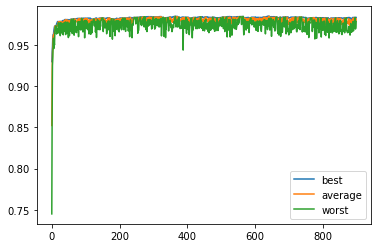

0.9857754010695187


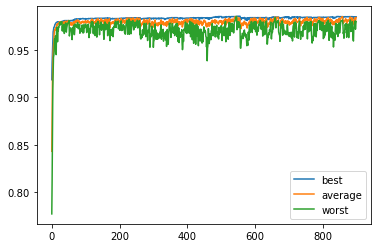

0.9855614973262032


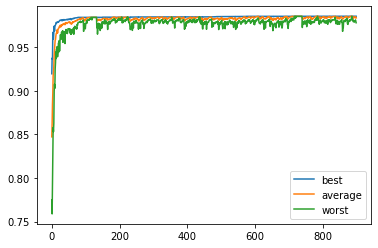

In [14]:
for d in [data,data2,data3]:
    print(d[0][0].max())
    plt.figure()
    # plt.tritle('d={} N={} t1={} t2={} t3={} T={}'.format(args[i][0],args[i][1],args[i][2],args[i][3],args[i][4],args[i][5]))
    plt.plot(d[0][0], label='best')
    plt.plot(d[0][1], label='average')
    plt.plot(d[0][2], label='worst')
    plt.legend()
    plt.show()


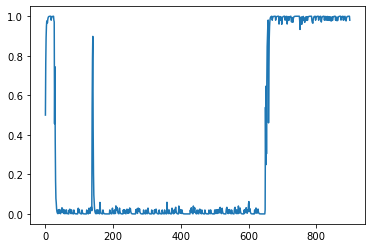

In [30]:
plt.figure()
d = data2[2].T
for i in range(1):#len(data2[2].T)):
    plt.plot(data2[2].T[i])
plt.show()